In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scvelo as scv
import scanpy
import smurf

import warnings
warnings.filterwarnings('ignore')

import dynamo as dyn

dyn.get_all_dependencies_version()

|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


package,umap-learn,pynndescent,python-igraph,numdifftools,seaborn,statsmodels,numba,dynamo-release,scikit-learn,cvxopt,pandas,scipy,numpy,networkx,pre-commit,colorcet,loompy,openpyxl,matplotlib,get-version,tqdm,setuptools
version,0.5.3,0.5.7,0.9.11,0.9.40,0.11.2,0.13.2,0.55.2,1.1.0,1.1.1,1.3.0,1.4.3,1.8.1,1.22.4,2.8.4,2.19.0,3.0.0,3.0.7,3.0.10,3.5.2,3.5.4,4.64.0,61.2.0


In [8]:
# adata = dyn.read_loom('/Users/xuezhengyang/Documents/Xue/Dynamo-Tutorial/data/DentateGyrus.loom')
adata = dyn.read_h5ad('/Users/xuezhengyang/Documents/Xue/Dynamo-Tutorial/data/DentateGyrus/10X43_1.h5ad')
# print(type(adata.obs['clusters']))
print(adata)

# data = pd.read_hdf('/Users/xuezhengyang/Documents/Xue/Dynamo-Tutorial/data/DentateGyrus/10X43_1.h5ad')
# print(data)

AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged'
    uns: 'clusters_colors'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'


In [49]:
# print(adata.layers['spliced'].shape)
s = adata.to_df(layer='spliced')
u = adata.to_df(layer='unspliced')
data = adata.to_df()
data.fillna(0,inplace=True)
# print(data)
# print(adata.obs['clusters'])

In [50]:
data = data.loc[:,(data!=0).any(axis=0)]
print(data)

index           Lypla1  Tcea1  Atp6v1h  Rb1cc1  St18  Pcmtd1  Rrs1  Adhfe1  \
index                                                                        
AAACATACCCATGA     0.0    0.0      0.0     2.0   0.0     1.0   0.0     0.0   
AAACATACCGTAGT     0.0    1.0      0.0     0.0   0.0     0.0   0.0     0.0   
AAACATACGAGAGC     0.0    0.0      0.0     0.0   0.0     0.0   0.0     0.0   
AAACATACTGAGGG     0.0    0.0      0.0     0.0   0.0     1.0   0.0     0.0   
AAACATTGGCATCA     0.0    0.0      0.0     0.0   0.0     0.0   0.0     0.0   
...                ...    ...      ...     ...   ...     ...   ...     ...   
TTTCTACTTCCCGT     0.0    0.0      2.0     0.0   0.0     0.0   0.0     0.0   
TTTGACTGCCTGTC     0.0    0.0      0.0     0.0   0.0     0.0   0.0     0.0   
TTTGACTGTCTGGA     0.0    0.0      0.0     0.0   0.0     0.0   0.0     0.0   
TTTGCATGGGAGTG     0.0    0.0      0.0     0.0   0.0     0.0   0.0     0.0   
TTTGCATGTTCTTG     0.0    0.0      0.0     0.0   0.0     0.0   0

In [45]:
print(data.index[np.where(np.isnan(data))[0]])

Index([], dtype='object', name='index')


In [51]:
# create a SMURF object which only return the imputed data
operator = smurf.SMURF(n_features=20, estimate_only=True)

# impute
data_imputed = operator.smurf_impute(data)

# create a SMURF object
operator = smurf.SMURF(n_features=20, estimate_only=False)

# impute
res = operator.smurf_impute(data)

# get the results
data_imputed = res["estimate"]

gene_matrix = res["gene latent factor matrix"]

cell_matrix = res["cell latent factor matrix"]

Running SCEnd on 13264 cells and 2930 genes
normalizing data by library size...
preprocessing data...
number of iteration:  1 / 10
number of iteration:  2 / 10
number of iteration:  3 / 10
number of iteration:  4 / 10
number of iteration:  5 / 10
number of iteration:  6 / 10
number of iteration:  7 / 10
number of iteration:  8 / 10
number of iteration:  9 / 10
number of iteration:  10 / 10
Running SCEnd on 13264 cells and 2930 genes
normalizing data by library size...
preprocessing data...
number of iteration:  1 / 10
number of iteration:  2 / 10
number of iteration:  3 / 10
number of iteration:  4 / 10
number of iteration:  5 / 10
number of iteration:  6 / 10
number of iteration:  7 / 10
number of iteration:  8 / 10
number of iteration:  9 / 10
number of iteration:  10 / 10


In [4]:
print(data_imputed)

NameError: name 'data_imputed' is not defined

In [9]:
dyn.pp.recipe_monocle(adata)

|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|-----> <insert> pp to uns in AnnData Object.
|-----------> <insert> has_splicing to uns['pp'] in AnnData Object.
|-----------> <insert> has_labling to uns['pp'] in AnnData Object.
|-----------> <insert> splicing_labeling to uns['pp'] in AnnData Object.
|-----------> <insert> has_protein to uns['pp'] in AnnData Object.
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----------> <insert> tkey to uns['

In [10]:
print(adata)

AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_cv', 'log_m', 'frac', 'use_for_pca', 'ntr'
    uns: 'clusters_colors', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores'
    layers: 'ambiguous', 'spliced', 'unspliced', 'X_spliced', 'X_unspliced'


In [ ]:
dyn.tl.dynamics(adata,model='stochastic')

|-----> dynamics_del_2nd_moments_key is None. Using default value from DynamoAdataConfig: dynamics_del_2nd_moments_key=False
|-----------> removing existing M layers:[]...
|-----------> making adata smooth...
|-----> calculating first/second moments...
|-----> [moments calculation] in progress: 100.0000%
|-----> [moments calculation] finished [17.5208s]


estimating gamma: 100%|██████████| 2000/2000 [01:16<00:00, 26.13it/s]


AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'log_m', 'score', 'log_cv', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics'
    uns: 'clusters_colors', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores'
    layers: 'ambiguous', 'spliced', 'unspliced', 'X_unspliced', 'X_spliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'moments_con'

In [ ]:
dyn.tl.reduceDimension(adata)

|-----> retrive data for non-linear dimension reduction...
|-----? adata already have basis umap. dimension reduction umap will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> <insert> connectivities to obsp in AnnData Object.
|-----> <insert> distances to obsp in AnnData Object.
|-----> <insert> neighbors to uns in AnnData Object.
|-----> <insert> neighbors.indices to uns in AnnData Object.
|-----> <insert> neighbors.params to uns in AnnData Object.
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [0.2696s]


In [ ]:
# dyn.tl.cell_velocities(adata)
dyn.tl.cell_velocities(adata, method='pearson', other_kernels_dict={'transform': 'sqrt'}, enforce=True, basis='umap')

|-----> 0 genes are removed because of nan velocity values.
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 100.0000%
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] finished [7.3991s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [1.2029s]


AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'log_m', 'score', 'log_cv', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'clusters_colors', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics', 'neighbors', 'grid_velocity_umap'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores', 'velocity_umap'
    layers: 'ambiguous', 'spliced', 'unspliced', 'X_unspliced', 'X_spliced', 'M_u

In [ ]:
# dyn.vf.VectorField(adata,basis = 'umap')
dyn.tl.cell_wise_confidence(adata)

AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase', 'jaccard_velocity_confidence'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'log_m', 'score', 'log_cv', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'clusters_colors', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics', 'neighbors', 'grid_velocity_umap'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores', 'velocity_umap'
    layers: 'ambiguous', 'spliced', 'unspliced', '

|-----------> plotting with basis key=X_umap
|-----------> skip filtering clusters by stack threshold when stacking color because it is not a numeric type


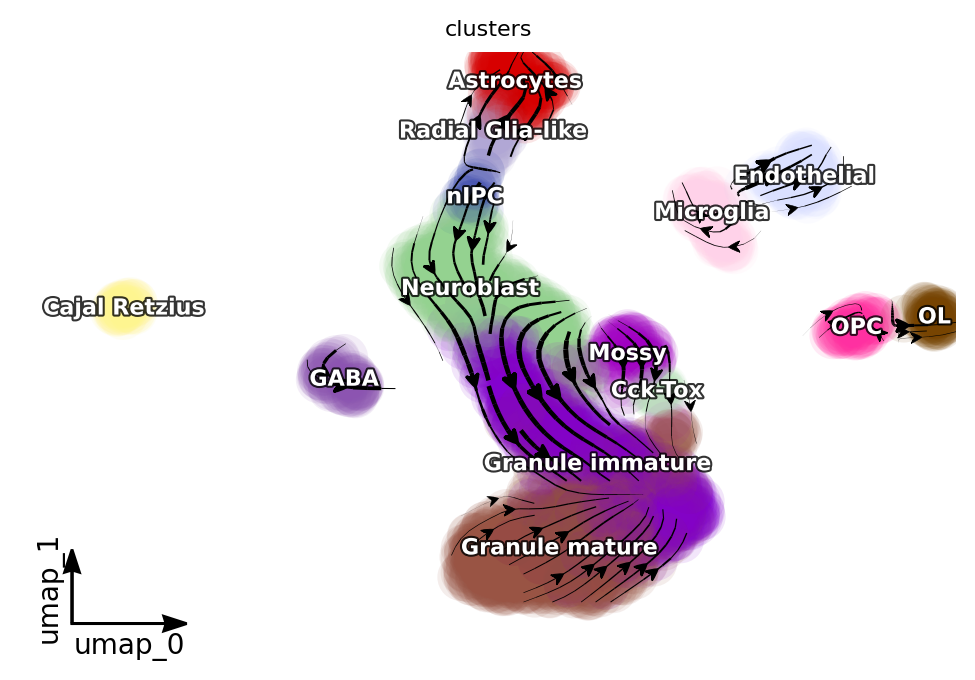

In [ ]:
# fig1, f1_axes = plt.subplots(ncols=2, nrows=1, constrained_layout=True, figsize=(12, 4))
# f1_axes[0] = dyn.pl.streamline_plot(adata, color_key_cmap = 'viridis', basis='umap', ax=f1_axes[0], show_legend='right', save_show_or_return='return')
dyn.pl.streamline_plot(adata, color=['clusters'], basis='umap', show_legend='on data', show_arrowed_spines=True)
# f1_axes[0].set_title('splicing')
# f1_axes[1] = dyn.pl.streamline_plot(adata, color_key_cmap = 'viridis', basis='umap', ax=f1_axes[1], show_legend='right', save_show_or_return='return')
# f1_axes[1].set_title('labeling')
plt.show()

In [ ]:
adata

AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase', 'jaccard_velocity_confidence'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'log_m', 'score', 'log_cv', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'clusters_colors', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics', 'neighbors', 'grid_velocity_umap'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores', 'velocity_umap'
    layers: 'ambiguous', 'spliced', 'unspliced', '

In [ ]:
print(adata.obs['jaccard_velocity_confidence'])

index
AAACATACCCATGA    0.283333
AAACATACCGTAGT    0.597826
AAACATACGAGAGC    0.240093
AAACATACTGAGGG    0.497006
AAACATTGGCATCA    0.318182
                    ...   
TTTCTACTTCCCGT    0.423387
TTTGACTGCCTGTC    0.477273
TTTGACTGTCTGGA    0.234914
TTTGCATGGGAGTG    0.626667
TTTGCATGTTCTTG    0.424028
Name: jaccard_velocity_confidence, Length: 2930, dtype: float64


In [ ]:
# adata.obsm[[key for key in adata.obsm if key.startswith('velocity_S')][0]]
# v_emb = adata.obsm['{}_umap'.format('velocity_S')]

In [ ]:
import eval_util
from imp import reload
reload(eval_util)

cluster_edges = [("OPC", "OL")]
eval_util.evaluate(adata, cluster_edges, 'clusters', "velocity_S", x_emb="X_umap")

# Cross-Boundary Transition Score (A->B)
{('OPC', 'OL'): 0.0007637298974116951}
Total Mean: 0.0007637298974116951
# Cross-Boundary Velocity Coherence (A->B)
{('OPC', 'OL'): 0.4420008783146269}
Total Mean: 0.4420008783146269
# Cross-Boundary Direction Correctness (A->B)
{('OPC', 'OL'): -0.9142212472363245}
Total Mean: -0.9142212472363245
# In-cluster Coherence
{'Astrocytes': 0.8404791038575167, 'Cajal Retzius': 0.9868506189128484, 'Cck-Tox': 0.9585453845622554, 'Endothelial': 0.946563280433264, 'GABA': 0.9382579669189135, 'Granule immature': 0.9179615032647545, 'Granule mature': 0.8854753870614275, 'Microglia': 0.9811293506692695, 'Mossy': 0.9401394894416929, 'Neuroblast': 0.9539555683039702, 'OL': 0.9363203553676266, 'OPC': 0.9322418867060114, 'Radial Glia-like': 0.9077369366474816, 'nIPC': 0.948677404594765}
Total Mean: 0.9338810169101283
# In-cluster Confidence
{'Astrocytes': 0.684809125531135, 'Cajal Retzius': 0.9146193812860479, 'Cck-Tox': 0.39450379658056556, 'Endothelial': 0.7538

{'Cross-Boundary Transition Score (A->B)': {('OPC',
   'OL'): [-0.0010162275510814446, 0.0022700344764670444, -0.004127873876393004, -5.122532693511649e-05, 0.004920345108283253, 0.0044849476156360825, -0.0011338911640949485]},
 'Cross-Boundary Velocity Coherence (A->B)': {('OPC',
   'OL'): [0.41874810808280427, 0.475570066189798, 0.4369118769415903, 0.4507896461222529, 0.4529514265605927, 0.413684040983439, 0.44535098332191114]},
 'Cross-Boundary Direction Correctness (A->B)': {('OPC',
   'OL'): [-0.9775787427909183, -0.7825831281087096, -0.9975441064073443, -0.9728441129039285, -0.7010642849389476, -0.9762527774815056, -0.9916815780229182]},
 'In-cluster Coherence': {'Astrocytes': [0.7756706834595667,
   0.8645833001601083,
   0.7291039696927603,
   0.9005067197278613,
   0.8143006985332772,
   0.8363493217242137,
   0.9013866028743643,
   0.8826065190631921,
   0.8423589307886794,
   0.8833802576771795,
   0.8190694972741137,
   0.8006809010278121,
   0.8451506518233177,
   0.868660